In [3]:
from mediapipe import solutions as mp
import cv2 as cv
import numpy as np

In [4]:
mp_drawing=mp.drawing_utils
mp_holistic=mp.holistic

In [5]:
holistic=mp_holistic.Holistic(min_detection_confidence=0.7)

In [59]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    if cv.waitKey(1)==27:
        cap.release()
        cv.destroyAllWindows()
        break
        
    image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(image)
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    
    
    cv.imshow('frame',image)

In [7]:
cap.release()

In [20]:
results.face_landmarks.landmark[0].visibility

0.0

In [23]:
l=['xyz']
l+l+[1]

['xyz', 'xyz', 1]

https://www.xircls.com/careers/18D53263/16/#content

In [9]:
total_landmarks=len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)

In [10]:
# now we will create a pandas data frame who will have columns/headers as each coordinate of each landmark

In [6]:
from pandas import *

In [12]:
landmark_list=['class']
for i in range(total_landmarks):
    landmark_list=landmark_list+[f'x{i}',f'y{i}',f'z{i}',f'v{i}']

In [16]:
len(landmark_list)

2005

In [17]:
df=DataFrame(columns=landmark_list)

In [18]:
df

,class,x0,y0,z0,v0,x1,y1,z1,v1,x2,...,z498,v498,x499,y499,z499,v499,x500,y500,z500,v500


In [19]:
df_example=DataFrame(columns=['1','2'])

In [28]:
df_example.loc[len(df_example)]=[1,2]

In [29]:
df_example

,1,2
0,1,2


In [67]:
# collecting live data
class_name='Happy'

In [68]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    
        
    image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(image)
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    
#     mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    
#     pose
    pose=results.pose_landmarks.landmark
    pose_row=list(np.array([[landmark.x,landmark.y,landmark.z,landmark.visibility] for landmark in pose]).flatten())
    face=results.face_landmarks.landmark
    face_row=list(np.array([[landmark.x,landmark.y,landmark.z,landmark.visibility] for landmark in face]).flatten())
    row=pose_row+face_row
    row.insert(0,class_name)
    
    #adding data to pandas data_frame
    df.loc[len(df)]=row
    
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

In [34]:
results.pose_landmarks.landmark

[x: 0.4646347463130951
y: 0.5662867426872253
z: -1.1903386116027832
visibility: 0.999579906463623
, x: 0.49943938851356506
y: 0.4867343008518219
z: -1.14574134349823
visibility: 0.9990409016609192
, x: 0.5220555067062378
y: 0.48642587661743164
z: -1.1460249423980713
visibility: 0.9992537498474121
, x: 0.5395239591598511
y: 0.4868623912334442
z: -1.1449389457702637
visibility: 0.9991329312324524
, x: 0.4213027060031891
y: 0.48730146884918213
z: -1.1252872943878174
visibility: 0.9988777041435242
, x: 0.39812448620796204
y: 0.48751649260520935
z: -1.1252028942108154
visibility: 0.9989908933639526
, x: 0.3790968954563141
y: 0.48905929923057556
z: -1.1259523630142212
visibility: 0.9986754655838013
, x: 0.570107638835907
y: 0.5066463351249695
z: -0.7018300890922546
visibility: 0.9992991089820862
, x: 0.34722182154655457
y: 0.511560320854187
z: -0.6593151688575745
visibility: 0.9987029433250427
, x: 0.5063410997390747
y: 0.6433524489402771
z: -1.0223109722137451
visibility: 0.9988228678703308

In [69]:
len(df[df['class']=='Happy'])

250

In [70]:
df.shape

(804, 2005)

In [74]:
# export df to csv
df.to_csv('data.csv',index=False)

In [75]:
# model training
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [76]:
# splitting data
x=df.drop(columns=['class'])
y=df['class']
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [77]:
X_train.shape

(603, 2004)

In [78]:
# creating pipeline
pipeline_dict={
    'lr':make_pipeline(StandardScaler(),LogisticRegression()),
    'rc':make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier()),
}

In [79]:
model_dict={}
for name,pipeline in pipeline_dict.items():
    model=pipeline.fit(X_train,y_train)
    model_dict[name]=model

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
model_dict['lr'].predict(X_test)

array(['Sad', 'Sad', 'Victorious', 'Happy', 'Happy', 'Victorious', 'Sad',
       'Happy', 'Sad', 'Victorious', 'Victorious', 'Happy', 'Victorious',
       'Happy', 'Victorious', 'Victorious', 'Sad', 'Victorious', 'Happy',
       'Victorious', 'Happy', 'Victorious', 'Victorious', 'Victorious',
       'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Victorious', 'Sad', 'Sad', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Victorious', 'Sad',
       'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Victorious', 'Happy', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Sad', 'Sad',
       'Victorious', 'Sad', 'Sad', 'Victorious', 'Victorious', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Sad', 'Victorious', 'Sad', 'Sad', 'Victorious', 'Sad', 'Happy',
     

In [84]:
model_dict['rf'].predict(X_test)

array(['Sad', 'Sad', 'Victorious', 'Happy', 'Happy', 'Victorious', 'Sad',
       'Happy', 'Sad', 'Victorious', 'Victorious', 'Happy', 'Victorious',
       'Happy', 'Victorious', 'Victorious', 'Sad', 'Victorious', 'Happy',
       'Victorious', 'Happy', 'Victorious', 'Victorious', 'Victorious',
       'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Victorious', 'Sad', 'Sad', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Victorious', 'Sad',
       'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Victorious', 'Happy', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Sad', 'Sad',
       'Victorious', 'Sad', 'Sad', 'Victorious', 'Victorious', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Sad', 'Victorious', 'Sad', 'Sad', 'Victorious', 'Sad', 'Happy',
     

In [85]:
model_dict['gb'].predict(X_test)

array(['Sad', 'Sad', 'Victorious', 'Happy', 'Happy', 'Victorious', 'Sad',
       'Happy', 'Sad', 'Victorious', 'Victorious', 'Happy', 'Victorious',
       'Happy', 'Victorious', 'Victorious', 'Sad', 'Victorious', 'Happy',
       'Victorious', 'Happy', 'Victorious', 'Victorious', 'Victorious',
       'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad',
       'Victorious', 'Sad', 'Victorious', 'Sad', 'Sad', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Victorious', 'Sad',
       'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Victorious', 'Happy', 'Sad', 'Victorious', 'Happy', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Victorious', 'Sad', 'Sad',
       'Victorious', 'Sad', 'Sad', 'Victorious', 'Victorious', 'Sad',
       'Happy', 'Victorious', 'Happy', 'Happy', 'Sad', 'Victorious',
       'Sad', 'Victorious', 'Sad', 'Sad', 'Victorious', 'Sad', 'Happy',
     

In [86]:
# evaluating and checking metrics


In [87]:
evaluating_dict={}
for name,model in model_dict.items():
    evaluating_dict[name]=model.score(X_test,y_test)

In [88]:
evaluating_dict

{'lr': 0.9950248756218906,
 'rc': 1.0,
 'rf': 0.9950248756218906,
 'gb': 0.9950248756218906}

In [89]:
# displaying confusion matrix
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [90]:
y_p={}
for name,model in model_dict.items():
    y_p[name]=model.predict(X_test)
    

Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.496x0.77)
Axes(0.125,0.11;0.3968x0.77)
Axes(0.125,0.11;0.31744x0.77)


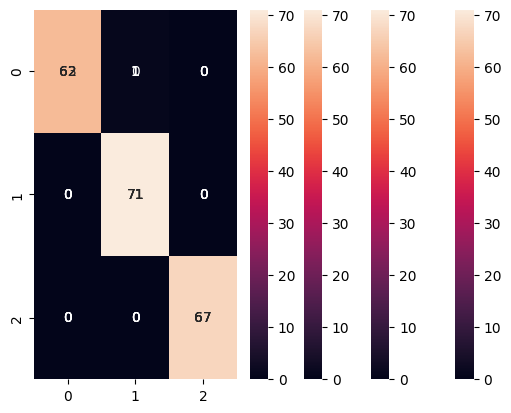

In [94]:
for name in y_p.keys():
    cm=confusion_matrix(y_test,y_p[name])
    print(heatmap(cm,annot=True))

In [2]:
import pickle

In [96]:
f=open('body_language_model.pickle','wb')
pickle.dump(model_dict['rf'],f)

In [97]:
# realtime detection

In [7]:
model=pickle.load(open('body_language_model.pickle','rb'))

In [8]:
import time

In [17]:
cap=cv.VideoCapture(0)
time.sleep(5)
while cap.isOpened():
    _,frame=cap.read()
    
        
    image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(image)
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    
#     mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    
#     pose
    pose=results.pose_landmarks.landmark
    pose_row=list(np.array([[landmark.x,landmark.y,landmark.z,landmark.visibility] for landmark in pose]).flatten())
    face=results.face_landmarks.landmark
    face_row=list(np.array([[landmark.x,landmark.y,landmark.z,landmark.visibility] for landmark in face]).flatten())
    row=pose_row+face_row
    x=DataFrame([row])
    text=model.predict(x)[0]
    cv.putText(image,text,(400,400),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),1,cv.LINE_AA)
    
    
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

In [13]:
x=DataFrame([row])
model.predict(x)[0]


C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Happy'

In [14]:
model.predict_proba(x)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.88, 0.  , 0.12]])